# plot results


In [1]:
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google.colab'

In [11]:
# ls /content/drive/MyDrive/

In [10]:

perfs, perfs_acc = np.load('/content/drive/MyDrive/results_imagenet-a.npy', allow_pickle=True)

num_cats  = 11
avgs_all = np.zeros((10,2))
X = np.arange(num_cats)

for i in range(10):
  a = np.array(list(perfs_acc[i].values()))
  avgs = a
  avgs_all[i,:] = np.mean(a, axis=0)
  # sortIdx = np.argsort(avgs,axis=0)[:,0]
  # avgs = avgs[sortIdx]  

avgs_all_imgNet = avgs_all


In [12]:

perfs, perfs_acc = np.load('/content/drive/MyDrive/results_imagenet-a-isolated.npy', allow_pickle=True)

num_cats  = 11
avgs_all = np.zeros((10,2))
X = np.arange(num_cats)

for i in range(10):
  a = np.array(list(perfs_acc[i].values()))
  avgs = a
  avgs_all[i,:] = np.mean(a, axis=0)
  # sortIdx = np.argsort(avgs,axis=0)[:,0]
  # avgs = avgs[sortIdx]  
avgs_all_imgNet_isolated = avgs_all


In [36]:
perfs, perfs_acc = np.load('/content/drive/MyDrive/results_D2O.npy', allow_pickle=True)

num_cats  = 29
avgs_all = np.zeros((10,2))
X = np.arange(num_cats)

for i in range(10):
  a = np.array(list(perfs_acc[i].values()))
  avgs = a
  avgs_all[i,:] = np.mean(a, axis=0)
  # sortIdx = np.argsort(avgs,axis=0)[:,0]
  # avgs = avgs[sortIdx]  

avgs_all_ExtremeDVB = avgs_all

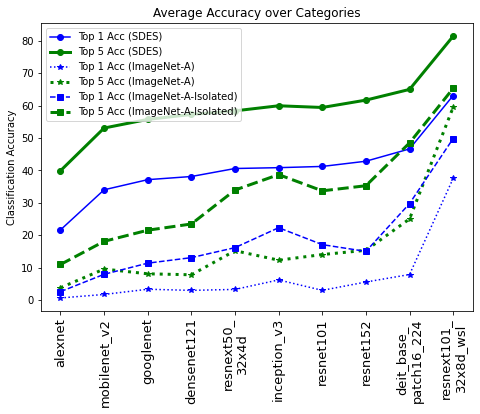

In [13]:
labels = ['resnet101', 'resnet152', 'alexnet', 'densenet121', 'googlenet', 'mobilenet_v2', 'inception_v3', 'resnext50_\n32x4d', 'resnext101_\n32x8d_wsl', 'deit_base_\npatch16_224']


import numpy as np
from matplotlib import pyplot as plt

X = np.arange(10)
fig = plt.figure(figsize=(6,4))

sortIdx = np.argsort(avgs_all_ExtremeDVB,axis=0)[:,0]
avgs_all_s = avgs_all_ExtremeDVB[sortIdx]

ax = fig.add_axes([0,0,1,1])

a, = ax.plot(avgs_all_s[:,0], color = 'b', marker = 'o')
b, = ax.plot(avgs_all_s[:,1], color = 'g', marker = 'o', lw=3)
a.set_label('Top 1 Acc (SDES)')
b.set_label('Top 5 Acc (SDES)')



c, = ax.plot(avgs_all_imgNet[sortIdx,0], color = 'b', linestyle= ':', marker = '*')
d, = ax.plot(avgs_all_imgNet[sortIdx,1], color = 'g', linestyle= ':', marker = '*', lw=3)
c.set_label('Top 1 Acc (ImageNet-A)')
d.set_label('Top 5 Acc (ImageNet-A)')


c, = ax.plot(avgs_all_imgNet_isolated[sortIdx,0], color = 'b', linestyle= '--', marker = 's')
d, = ax.plot(avgs_all_imgNet_isolated[sortIdx,1], color = 'g', linestyle= '--', marker = 's', lw=3)
c.set_label('Top 1 Acc (ImageNet-A-Isolated)')
d.set_label('Top 5 Acc (ImageNet-A-Isolated)')



ax.set_ylabel('Classification Accuracy')
ax.set_title('Average Accuracy over Categories')
ax.set_xticks(X)
ax.set_xticklabels(np.array(labels)[sortIdx], rotation=90, fontsize=13)
# ax.set_yticks(np.arange(0, 81, 10))

plt.legend()

fig.show()

# plt.bar(avgs, height = 1, width=2)
# plt.bar(avgs[:,1], height=2, width=0.8)

In [ ]:
avgs_all_imgNetA

array([[ 0.63991489,  3.79181992],
       [ 1.72368385,  9.56436108],
       [ 3.33197819,  8.09413873],
       [ 2.97943452,  7.79302116],
       [ 3.28000796, 15.22503428],
       [ 2.9882068 , 14.03692129],
       [ 6.20905948, 12.29856601],
       [ 5.55883073, 15.34792539],
       [ 7.87732317, 25.03749409],
       [37.56282282, 59.51413203]])

In [ ]:
avgs_all

array([[17.92234686, 34.70778894],
       [27.96322195, 45.9265225 ],
       [29.18831172, 47.09555325],
       [32.14957375, 50.37477735],
       [33.96676101, 52.07858284],
       [34.4416358 , 52.60973036],
       [34.6080428 , 52.38349532],
       [36.99188596, 55.18665601],
       [38.59049343, 56.4760194 ],
       [60.46377091, 77.73179386]])

# Analysis of common errors across models

In [23]:
import os

# !unzip /content/drive/MyDrive/D2O.zip
# !mv NewD2I/ D2O 

which_db = 'D2O'
# dirs = os.listdir(f'/content/drive/MyDrive/{which_db}/')
dirs = os.listdir(f'{which_db}/')
if '.DS_Store' in dirs:
  dirs.remove('.DS_Store')
# dirs.remove('.ipynb_checkpoints')
for i in ['person', 'face', 'miscellaneous', 'cow', 'car', 'cat', 'giraffe']:
  if i in dirs:
    dirs.remove(i)  

In [28]:
# dirs

In [37]:

import torch
which_db = 'D2O'


count_all_models_correct = {}
count_all_models_incorrect = {}

for folder in dirs:

  count_c, count_w = 0, 0
  count_c_t5, count_w_t5 = 0, 0  


  folder_corrected = folder #.replace('_', ' ')
  print(folder)
  
  if '.' in folder or folder in ['person', 'face', 'miscellaneous', 'cow', 'car', 'cat', 'giraffe']: continue

  
  indir = os.path.join(f'./{which_db}/', folder)        
  files = os.listdir(indir)    

  count = 0 
  for idx, f in enumerate(files):
    if f == '.DS_Store': continue
    count += 1

    count_c += all([folder_corrected.lower() in perfs[idx_m][folder][f][0] for idx_m, _ in enumerate(labels)]) # means all models were correct top 1
    count_w += all([folder_corrected.lower() not in perfs[idx_m][folder][f][0] for idx_m, _ in enumerate(labels)]) # means all models were correct top 1   

    count_c_t5 += all([folder_corrected.lower() in perfs[idx_m][folder][f][1] for idx_m, _ in enumerate(labels)]) # means all models were correct top 1
    count_w_t5 += all([folder_corrected.lower() not in perfs[idx_m][folder][f][1] for idx_m, _ in enumerate(labels)]) # means all models were correct top 1   

  count_all_models_correct[folder] = (count_c/count, count_c_t5/count)
  count_all_models_incorrect[folder] = (count_w/count, count_w_t5/count)

bagel
sock
pillow
spatula
mushroom
pill bottle
teddy
basketball
umbrella
banana
elephant
acorn
toaster
clock
helmet
toilet seat
syringe
vase
turtle
sunglass
bell pepper
bicycle-built-for-two
tractor
kite
mouse
pretzel
squirrel
pizza
rabbit


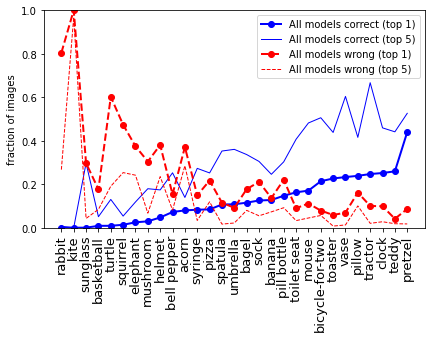

In [44]:
# plot area
from matplotlib import pyplot as plt

x_t = list(count_all_models_correct.keys())
x_t = ','.join(x_t).replace('bicycle-built-for-two', 'bicycle-for-two').split(',')

X = np.arange(29)

t1_c = np.array([i[0] for i in count_all_models_correct.values()]) 
t5_c = np.array([i[1] for i in count_all_models_correct.values()]) 

t1_w = np.array([i[0] for i in count_all_models_incorrect.values()])
t5_w = np.array([i[1] for i in count_all_models_incorrect.values()]) 


fig = plt.figure(figsize=(15,4))
sortIdx = np.argsort(t1_c)
ax1 = fig.add_subplot(121)
a, = ax1.plot(t1_c[sortIdx], color = 'b', marker = 'o', lw=2)
b, = ax1.plot(t5_c[sortIdx], color = 'b',  lw=1) #marker = 'o',
a.set_label('All models correct (top 1)')
b.set_label('All models correct (top 5)')
ax1.set_ylabel('fraction of images')
# ax1.set_title('Average Accuracy over Categories')
ax1.set_ylim((0,1))
ax1.set_xticks(X)
ax1.set_xticklabels(np.array(x_t)[sortIdx], rotation=90, fontsize=13)

c, = ax1.plot(t1_w[sortIdx], color = 'r', marker = 'o', linestyle= '--', lw=2)
d, = ax1.plot(t5_w[sortIdx], color = 'r', lw=1, linestyle= '--')
c.set_label('All models wrong (top 1)')
d.set_label('All models wrong (top 5)')

plt.legend()


# sortIdx = np.argsort(t1_w)
# ax2 = fig.add_subplot(122)
# a, = ax2.plot(t1_w[sortIdx], color = 'b', marker = 'o')
# b, = ax2.plot(t5_w[sortIdx], color = 'g', marker = 'o', lw=2)
# a.set_label('All models wrong (top 1)')
# b.set_label('All models wrong (top 5)')
# ax2.set_ylabel('fraction of images')
# # ax1.set_title('% acc')
# ax2.set_xticks(X)
# ax2.set_xticklabels(np.array(x_t)[sortIdx], rotation=90, fontsize=13)


# plt.legend()
fig.show()


